In [1]:
%%time
from pycolator import *

idCol = 'SpecId'
scoreCol = 'NuXL:score'
excluded = ['SpecId', 'Label', 'ScanNr', 'Peptide', 'Proteins', 'FDR', 'q-val', 'class-specific_q-val', 'Rank', 'temp_score', 'percolator_score']

dSlow = readAndProcess('../data/1-AChernev_080219_dir_HeLa_cyt_UCGA_slow.tsv', idCol, scoreCol, excludedCols = excluded)
features = [x for x in list(dSlow.columns) if (x not in excluded)]

file read...
strings converted to floats...
q-values estimated...
ranks computed...
features normed...
floats converted to ints...
file ready!
Wall time: 20.8 s


Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 3603, length of negative training set: 28394
Optimal parameters are C=10 and class_weight={0: 1, 1: 1}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 4003, length of negative training set: 28394
Optimal parameters are C=10 and class_weight={0: 1, 1: 1}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 4435, length of negative training set: 28396
Optimal parameters are C=1 and class_weight={0: 1, 1: 1}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 294.28440148394486.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 4580, length of negative training set: 28394
Optimal parameters are C=10 and class_weight={0: 1, 1: 1}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 4656, length of negative training set: 28394
Optimal parameters are C=

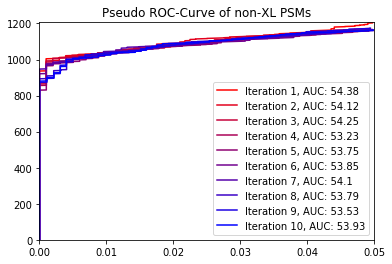

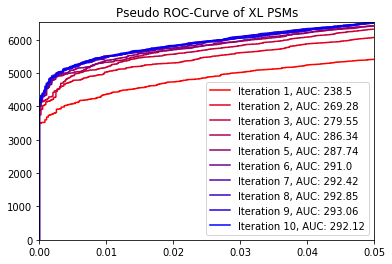

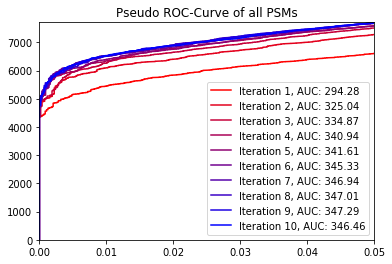

AUC: 293.35412286258537
Identifications at 1%: 6528
Wall time: 2min 58s


In [2]:
%%time

saveName = ''

p = percolator_experimental(dSlow, idCol, features, plotSaveName = saveName)
print('AUC: {}'.format(pseudoROC(p.loc[p['NuXL:isXL'] == 1], plot = False)))
print('Identifications at 1%: {}'.format(len(p.loc[(p['q-val'] <= 0.01) & (p['NuXL:isXL'] == 1)])))

In [9]:
print('AUC: {}'.format(pseudoROC(p.loc[p['NuXL:isXL'] == 1], plot = False)))
print('Identifications at 1%: {}'.format(len(p.loc[(p['q-val'] <= 0.01) & (p['NuXL:isXL'] == 1)])))

AUC: 293.35412286258537
Identifications at 1%: 5526


In [10]:
print('AUC: {}'.format(pseudoROC(pr.loc[pr['NuXL:isXL'] == 1], plot = False)))
print('Identifications at 1%: {}'.format(len(pr.loc[(pr['q-val'] <= 0.01) & (pr['NuXL:isXL'] == 1)])))

AUC: 291.06515300158816
Identifications at 1%: 5518


In [13]:
293.58/292.86

1.002458512599877

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 3248, length of negative training set: 8068
Optimal parameters are C=10 and class_weight={0: 3, 1: 1}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 3627, length of negative training set: 8069
Optimal parameters are C=10 and class_weight={0: 1, 1: 1}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 4169, length of negative training set: 8069
Optimal parameters are C=10 and class_weight={0: 1, 1: 1}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 301.1279324478431.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 4351, length of negative training set: 8068
Optimal parameters are C=1 and class_weight={0: 1, 1: 1}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 4482, length of negative training set: 8069
Optimal parameters are C=10 and

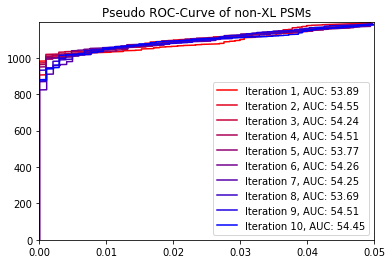

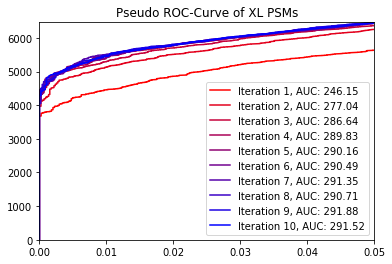

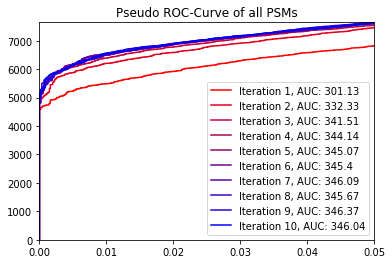

AUC: 291.06515300158816
Identifications at 1%: 6529
Wall time: 1min 45s


In [3]:
%%time

saveName = ''

pr = percolator_experimental(dSlow, idCol, features, optimalRanking = False, useRankOneOnly = True ,plotSaveName = saveName)
print('AUC: {}'.format(pseudoROC(pr.loc[pr['NuXL:isXL'] == 1], plot = False)))
print('Identifications at 1%: {}'.format(len(pr.loc[(pr['q-val'] <= 0.01) & (pr['NuXL:isXL'] == 1)])))

In [29]:
dSlow[5995:6000].loc[:,['SpecId','Label','mass','peplen','NuXL:total_loss_score','NuXL:score','Proteins','FDR','q-val']]

,SpecId,Label,mass,peplen,NuXL:total_loss_score,NuXL:score,Proteins,FDR,q-val
82853,controllerType=0controllerNumber=1scan=36273,1,0.583746,0.681818,0.064730,0.083491,sp|Q9H7D0|DOCK5_HUMAN,0.055871,0.055871
69018,controllerType=0controllerNumber=1scan=30011,0,0.414381,0.295455,0.076089,0.083490,DECOY_sp|Q6DN90|IQEC1_HUMAN,0.056028,0.056019
42358,controllerType=0controllerNumber=1scan=20217,1,0.227019,0.136364,0.075277,0.083470,sp|P19338|NUCL_HUMAN,0.056019,0.056019
91085,controllerType=0controllerNumber=1scan=41875,0,0.556796,0.363636,0.071826,0.083468,DECOY_sp|P61962|DCAF7_HUMAN,0.056176,0.056167
9758,controllerType=0controllerNumber=1scan=6295,1,0.337703,0.159091,0.075906,0.083467,sp|P46777|RL5_HUMAN,0.056167,0.056167


In [ ]:
# ,'NuXL:XL_U','NuXL:XL_C','NuXL:XL_G','NuXL:XL_A'

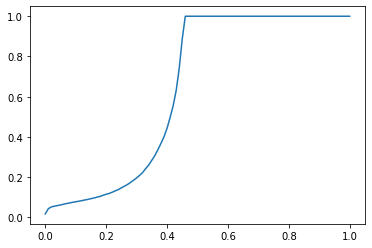

In [14]:
x = np.linspace(0,1,101)
y = [len(dSlow.loc[dSlow['q-val'] <= q])/len(dSlow) for q in x]

plt.plot(x, y)

In [13]:
np.linspace(0,1,101)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 3600, length of negative training set: 28322
Optimal parameters are C=10 and class_weight={0: 1, 1: 1}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 3977, length of negative training set: 28406
Optimal parameters are C=10 and class_weight={0: 1, 1: 1}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 4511, length of negative training set: 28456
Optimal parameters are C=10 and class_weight={0: 1, 1: 1}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 288.5012484380159.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 4863, length of negative training set: 28589
Optimal parameters are C=10 and class_weight={0: 1, 1: 1}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 4305, length of negative training set: 28399
Optimal parameters are C=

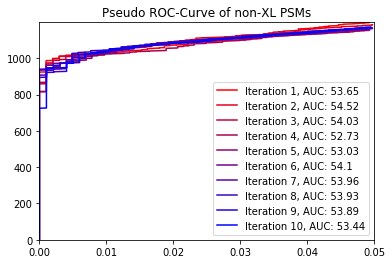

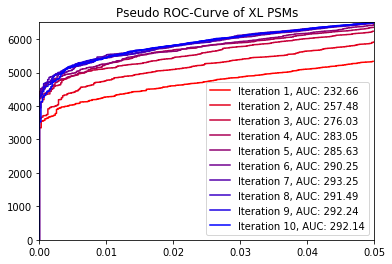

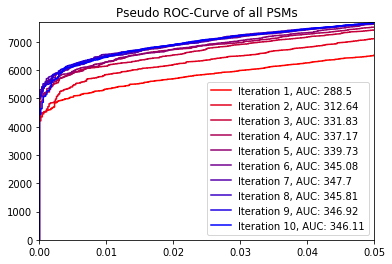

Wall time: 3min


In [2]:
%%time

saveName = '../results/peptideTestReloaded_{}.png'

p = percolator_experimental(dSlow, idCol, features, plotSaveName = saveName, peptideTest = True)

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 3469, length of negative training set: 28734
Optimal parameters are C=10 and class_weight={0: 1, 1: 1}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 4390, length of negative training set: 28167
Optimal parameters are C=10 and class_weight={0: 1, 1: 1}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 4003, length of negative training set: 28283
Optimal parameters are C=10 and class_weight={0: 1, 1: 1}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 287.2210746157376.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 5005, length of negative training set: 27986
Optimal parameters are C=1 and class_weight={0: 1, 1: 1}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 4699, length of negative training set: 28592
Optimal parameters are C=1

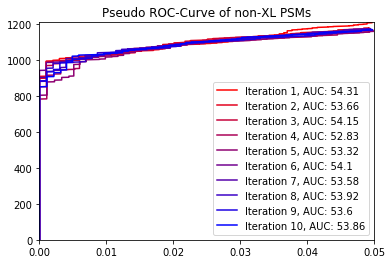

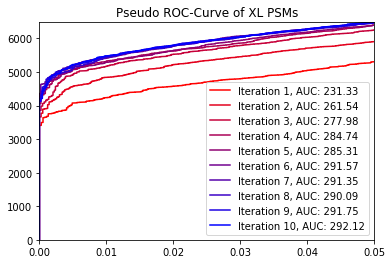

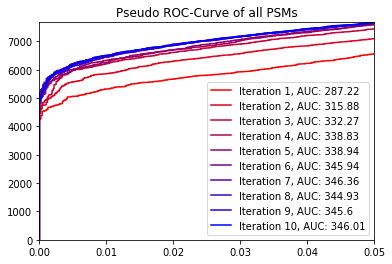

Wall time: 2min 48s


In [3]:
%%time

saveName = '../results/peptideTest_withoutProp_{}.png'

p = percolator_experimental(dSlow, idCol, features, plotSaveName = saveName, balancingInner = False, balancingOuter = False, peptideTest = True)

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 3805, length of negative training set: 33633
Optimal parameters are C=10 and class_weight={0: 1, 1: 1}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 3696, length of negative training set: 33507
Optimal parameters are C=10 and class_weight={0: 1, 1: 1}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 4365, length of negative training set: 33038
Optimal parameters are C=10 and class_weight={0: 1, 1: 1}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 289.75782002318005.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 3744, length of negative training set: 33231
Optimal parameters are C=10 and class_weight={0: 1, 1: 1}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 4794, length of negative training set: 33207
Optimal parameters are C

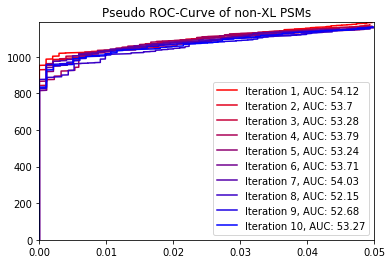

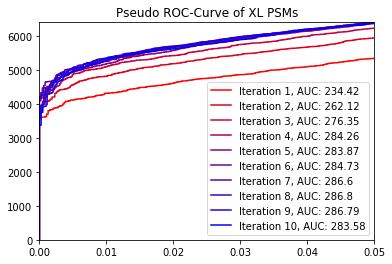

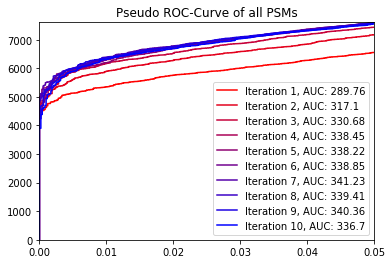

Wall time: 5min 24s


In [4]:
%%time

saveName = '../results/peptideTest_withoutOptimalRanking_{}.png'

p = percolator_experimental(dSlow, idCol, features, plotSaveName = saveName, optimalRanking = False, rankOption = True, peptideTest = True)

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 66, length of negative training set: 6
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 1}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 67, length of negative training set: 7
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 1}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 67, length of negative training set: 7
Optimal parameters are C=0.1 and class_weight={0: 1, 1: 1}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 4.831474843281398.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 66, length of negative training set: 6
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 1}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 67, length of negative training set: 7
Optimal parameters are C=0.1 and class_weight={0: 

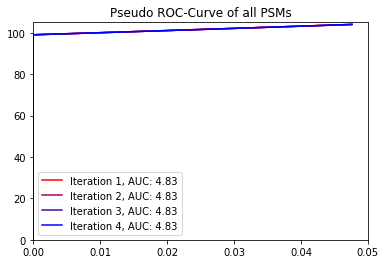

Wall time: 1.23 s


In [66]:
%%time

saveName = ''

p = percolator_experimental(df, idCol, features, plotSaveName = saveName, identsAsMetric = 'automatic', plotXLnXL = False)

0.9423076923076916

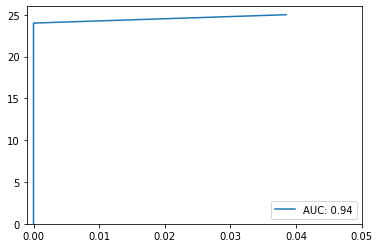

In [51]:
pseudoROC(df)